# Baking Bread

*Topic: Food Science, Physics, Math*

*Prerequisite Knowledge: Math*

**Problem Statement**: How does a pancake taken from the oven cool?


## Theory

In Food Sciences, we often have to resort to modelling in order to make predictions about the outcome of our product. This usually ends up as a detour into computational simulations and physics.

For this example, we will be looking at the cooling of a pancake taken from the oven.

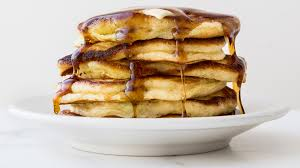

### Heat Flow

By Fourier's law of cooling, the flow of heat by conduction is proportional to the temperature gradient (temperature difference) across the object, as well as the cross-sectional area.

For a one-dimensional example (a rod heated at one end), the temperaturechange is given by

$$
\frac{d}{dt}T = -k \frac{d}{dx}T
$$

The temperature change (per time) $dT/dt$ is proportional to the conductance $k$ and temperature difference across the rod $dT/dx$. To see this in action, take a look at this gif of a rod held at different temperatures at the ends: https://upload.wikimedia.org/wikipedia/commons/f/f7/Heat_Transfer.gif.



In three dimensions, we will have to consider the surface area of the oject as well. Instead of using $dT/dx$, we have to consider the Laplacian ($\nabla^2T$) of the temperature.

$$
\frac{d}{dt}T =\alpha \nabla^2T
$$

Where $\alpha$ is the thermal diffusivity of the material. The Laplacian is the divergence of the gradient, or how much spread-ier the gradient gets. It can be written in many forms. In cartesian coordinates ($x,y,z$), it has the form

$$
\nabla^2T \equiv \frac{d^2}{dx^2}T + \frac{d^2}{dy^2}T + \frac{d^2}{dz^2}T
$$

We can also consider the Laplacian in cylindrical coordinates ($r,\varphi,z$):


$$
\nabla^2T \equiv \frac{1}{r}\frac{d}{dr}\left(r\frac{d}{dr}T\right) + \frac{1}{r^2}\frac{d^2}{d\varphi^2}T + \frac{d^2}{dz^2}T
$$

Or spherical coordiantes. For our example, we will consider the pancake in cartesian coordinates.

## Computational Approach

Computational methods have the advantage of being able to perform large numbers of tasks relatively quickly. We will take advantgae of this fact in order to perform this modelling.


### Flapjack Model

The heat flow across the pancake is non-uniform. The sides will cool faster than the centre, and the corners will cool the fastest. In order to accurately model this behaviour, we will have to discretize (break down into smaller parts) our pancake. 

We will use a 3D array for this purpose. Numpy allows us to build higher dimensional arrays to hold numbers and modify them later. The values in our array will then be the temperature at that point. 

For example, a rod can be broken down into a linear array which tells us its temperature at different points along the rod:

\begin{pmatrix}
20 & 20 & 25 & 30 & 35
\end{pmatrix}

Where one end is hotter than the other. A flat plate can similarly be broken down:

\begin{pmatrix}
20 & 20 & 20 & 20 & 20 \\
20 & 25 & 25 & 25 & 20 \\
20 & 25 & 35 & 25 & 20 \\
20 & 25 & 25 & 25 & 20 \\
20 & 20 & 20 & 20 & 20 
\end{pmatrix}

Where we can see that the centre of the plate is warmer than the edges. We can naturally extend this to three-dimensions, although it becomes harder to visually represent this.

In reality, the objects around us have continuous temperature gradients, rather than chunks with different temperatures. Hence, this is only a numerical approximation to reality. It then goes without saying that, the finer the mesh of points we use to represent our object, the more accurate the model will be.

For this example, we will be using a array of $20\times20\times10$ to represent our flapjack.

### Numerical Integration: Time flow

As shown earlier, the change of temperature with time is given by

$$
\frac{d}{dt}T =\alpha \nabla^2T
$$

Ignore the Laplacian ($\nabla^2$) for now. Looking at this, we can find the change in temperature of one point in our grid.


$$
dT =\alpha \nabla^2T \cdot dt
$$

We can take a small step in time, $dt$, and solve the Laplacian in order to find the change in temperature of that one point. Repeating this throughout the flapjack, we can then find the temperature evolution over time.

In our model, we use timesteps of $dt=0.1$s. Again, as time flows continuously in reality, this is merely an approximation. The smaller the time steps we use, the more accurate our model (at the cost of computational power).

### Numerical Differentiation

How to we solve the Laplacian? As shown earlier, the Laplacian in cartesian coordinates is given by:

$$
\nabla^2T \equiv \frac{d^2}{dx^2}T + \frac{d^2}{dy^2}T + \frac{d^2}{dz^2}T
$$

First, we have to consider the differental $dT/dx$. We can find this by finding the temperature gradient at a point. We can just find the rise over run a shown:

$$
\frac{d}{dx}T \approx \frac{T(x) - T(x - dx)}{dx}
$$

As our model uses a discrete grid, we can simply find the difference between two adjacent points, $x_i$ and $x_{i-1}$. $dx$ just becomes one unit of spacing. Hence, at the point $x_i$,

$$
\frac{d}{dx}T(x_i) \approx T(x_i) - T(x_{i-1})
$$

The second differential can be taken in a similar way. We can find that

$$
\begin{align}
\frac{d^2}{dx^2}T(x_i) 
&\approx \frac{\frac{d}{dx}T(x_{i+1}) - \frac{d}{dx}T(x_i)}{dx} \\
&\approx [T(x_{i+1}) - T(x_{i})] - [T(x_i) - T(x_{i-1})] \\
&= T(x_{i+1}) + T(x_{i-1}) - 2T(x_{i})
\end{align}
$$

Thus, our Laplacian can be found by simply finding the temperature difference across adjacent points in our grid. For points at the edges of our model, we can instead consider the room temperature. We can extend this approach for the all three cartesian directions.

## Simulation

Consider a cubical bun at initial temperature $220°$C. We will consider a 3D grid of points at different temperatures as our bun:

### Libraries

First, we will have to import our libraries. We will need

1.   `matplotlib.pyplot` for general plotting
2.   `numpy` for doing math, and for arrays which will hold the pieces of our model in a grid
3.   `mpl_toolkits.mplot3d` for 3d plots
4.   `matplotlib.animation` for making animations (Optional)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d
from matplotlib import animation

### Variables

Next, we need to consider the variables we require for the simulation. We will have to define the time step for our numerical integration, $dt$. We will also put down the total run time of our simulation here.

In [ ]:
delta_t = 0.01                  # Time step
runtime = 30                    # Total run time of simulation

We can also note down the thermal conductivity of our flapjack, $\alpha$. We will just use an arbitrary value for now.

The initial temperature and room temperature are also defined

In [ ]:
alpha = 1                       # Thermal diffusitivty of model
initial_T = 220.0               # Initial temperature of the flapjack
rtp = 20                        # Room temperature

We will also need a list to hold the time at each instant in time. As we take a step $dt$ in time, we add on the current time to the end of this list.

We also make one for the average temperature.

In [ ]:
time_hist = [0]
avg_temp = [initial_T]

Finally, the most important part. We will need to make a 3D array to represent our flapjack. We will use an array of size $(x=20, y = 20, z = 10)$.

There are other ways to make this model. The approach used is simply the one I am most familiar with.

In [ ]:
flapjack = [[[initial_T for z in range(10)] for y in range(20)] for x in range(20)]

flapjack = np.array(flapjack)
flapjack                        # To check the contents of our array

array([[[220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        ...,
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.]],

       [[220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        ...,
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.]],

       [[220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        ...,
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.],
        [220., 220., 220., ..., 220., 220., 220.]],

       ...,

       [[220., 220., 220

### 3D Plot (Optional)

We can write a function to create a 3D plot of our pancake. We will take a cross-sectional slice of the pancake, and show the temperature along the 3rd axis.

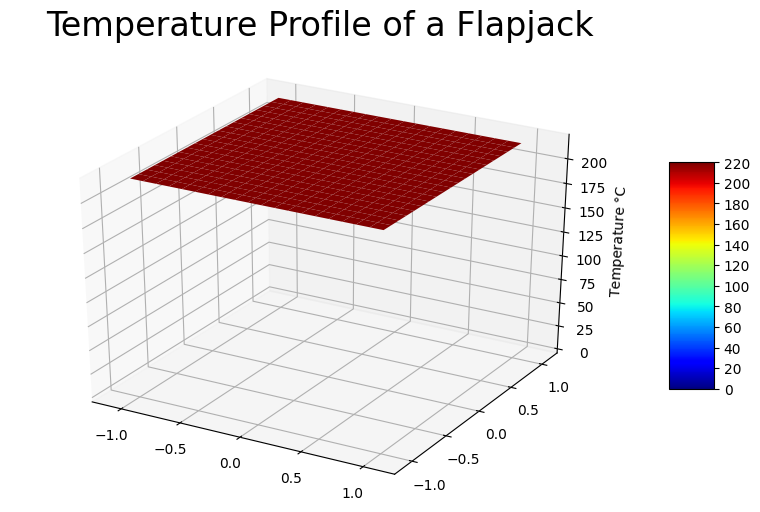

In [ ]:
def plot_bread(bread_array):
    fig = plt.figure(figsize = (10,6), dpi = 100)                               # Changing the resolution of the figure
    ax = plt.axes(projection='3d')                                              # Define the 3D plot

    x_data = np.linspace(-1,1,bread_array.shape[0])                             # As our array holds the temperatures only, we need an array
    y_data = np.linspace(-1,1,bread_array.shape[1])                             # for the positions of the points. We will simply take 100
                                                                                # evenl-spaced points between -1 and 1. 

    X,Y = np.meshgrid(x_data,y_data)                                            # Changing the linear arrays into a 2D mesh (required for 3D plots)
    Z = bread_array[:,:,int(bread_array.shape[2]/2)]                            # Now, we take the temperature across the cross-section using array slicing

    sctt = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor='none', vmax = initial_T, vmin = 0)
                                                                                # Used to create a surface plot. We define a colormap (cmap), 
                                                                                # as well as the max and min temperatures to show

    ax.set_xlim3d(-x_data[-1]*1.2, x_data[-1]*1.2)                              # Here, we set the limits of the axes of the plot
    ax.set_ylim3d(-y_data[-1]*1.2, y_data[-1]*1.2)
    ax.set_zlim3d(0, initial_T)

    ax.set_zlabel("Temperature $\degree$C")                                     # We label the relevant axis

    ax.set_title("Temperature Profile of a Flapjack", fontsize = 24, y = 1.1)   # And set the title of our plot

    fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5, ticks = np.linspace(0,220,12,endpoint = 1))
                                                                                # This function sets up a colorbar for show

    plt.show()                                                                  # Show our figure


plot_bread(flapjack)        # Let's test it out on our initial flapjack!

### Laplacian Function

For ease of access, we define a function to compute the Laplacian for us. We have to find a new 3D array, which will hold the Laplacian at every point. The Laplacian is then computed for every point, hence we need three nested loops.

This function should take in the array of our model, and return an array (of the same size) of the Laplacian at every point.

In [ ]:
def laplacian(bread_array,room_temp = rtp):
    temp_change = bread_array.copy()                            # Creating an array of the right size by just copying

    for x in range(bread_array.shape[0]):                       # Iterate over the x
        for y in range(bread_array.shape[1]):                   # and the y 
            for z in range(bread_array.shape[2]):               # and the z
                temp_change[x,y,z] = 0                          # Set the initial value to be 0 (Not really needed)

                # For x Direction
                prev_x = room_temp if (x == 0) else bread_array[x - 1,y,z]                          # Temperature of the segment before (or room temp if its the side)
                next_x = room_temp if (x + 1 == bread_array.shape[0]) else bread_array[x + 1,y,z]   # Temperature of the segment after (or room temp if its the side)
                curr_x = bread_array[x,y,z]                                                         # Temperature of the segment 

                d2dx2 = (prev_x - curr_x) + (next_x - curr_x)                                       # (d^2)/(dx^2) T

                # For y Direction
                prev_y = room_temp if (y == 0) else bread_array[x,y - 1,z]                          # Temperature of the segment before (or room temp if its the side)
                next_y = room_temp if (y + 1 == bread_array.shape[1]) else bread_array[x,y + 1,z]   # Temperature of the segment after (or room temp if its the side)
                curr_y = bread_array[x,y,z]                                                         # Temperature of the segment 

                d2dy2 = (prev_y - curr_y) + (next_y - curr_y)                                       # (d^2)/(dy^2) T
                
                # For x Direction
                prev_z = room_temp if (z == 0) else bread_array[x,y,z - 1]                          # Temperature of the segment before (or room temp if its the side)
                next_z = room_temp if (z + 1 == bread_array.shape[2]) else bread_array[x,y,z + 1]   # Temperature of the segment after (or room temp if its the side)
                curr_z = bread_array[x,y,z]                                                         # Temperature of the segment 

                d2dz2 = (prev_z - curr_z) + (next_z - curr_z)                                       # (d^2)/(dz^2) T

                temp_change[x,y,z] = d2dx2 + d2dy2 + d2dz2                      # Summing them up, to give our Laplacian as defined above.

    return temp_change                                                          # Returning the Laplacian to whatever called this function.

To test this out, we can put in our initial pancake. We should see that the Laplaican is 0 everywhere, except close to the edges

In [ ]:
Lap_test = laplacian(flapjack)

print(Lap_test)

[[[-600. -400. -400. ... -400. -400. -600.]
  [-400. -200. -200. ... -200. -200. -400.]
  [-400. -200. -200. ... -200. -200. -400.]
  ...
  [-400. -200. -200. ... -200. -200. -400.]
  [-400. -200. -200. ... -200. -200. -400.]
  [-600. -400. -400. ... -400. -400. -600.]]

 [[-400. -200. -200. ... -200. -200. -400.]
  [-200.    0.    0. ...    0.    0. -200.]
  [-200.    0.    0. ...    0.    0. -200.]
  ...
  [-200.    0.    0. ...    0.    0. -200.]
  [-200.    0.    0. ...    0.    0. -200.]
  [-400. -200. -200. ... -200. -200. -400.]]

 [[-400. -200. -200. ... -200. -200. -400.]
  [-200.    0.    0. ...    0.    0. -200.]
  [-200.    0.    0. ...    0.    0. -200.]
  ...
  [-200.    0.    0. ...    0.    0. -200.]
  [-200.    0.    0. ...    0.    0. -200.]
  [-400. -200. -200. ... -200. -200. -400.]]

 ...

 [[-400. -200. -200. ... -200. -200. -400.]
  [-200.    0.    0. ...    0.    0. -200.]
  [-200.    0.    0. ...    0.    0. -200.]
  ...
  [-200.    0.    0. ...    0.    0. -20

### Running the Model

Now, we are all set to run the model. We can use a while loop to repeat the steps through time until we obtain the final model

In [ ]:
while time_hist[-1] < runtime:                                      # While the current time is lesser than the total defined run time
    time_hist.append(time_hist[-1] + delta_t)                       # Update the new step in time

    flapjack = flapjack + alpha * laplacian(flapjack) * delta_t     # compute the Laplacian, and update the temperature across the flapjack
    avg_temp.append(np.average(flapjack))                           # Appends the average temperature for plotting later

    if len(time_hist) % 100 == 0:
        plot_bread(flapjack)                                        # Just for fun, we plot the temperature profile every 100 steps in time

                                                                    # repeat

plot_bread(flapjack)                                                # When done, plot the flapjack

Output hidden; open in https://colab.research.google.com to view.

### Plotting the Results

We can do a plot of the average temperature over time

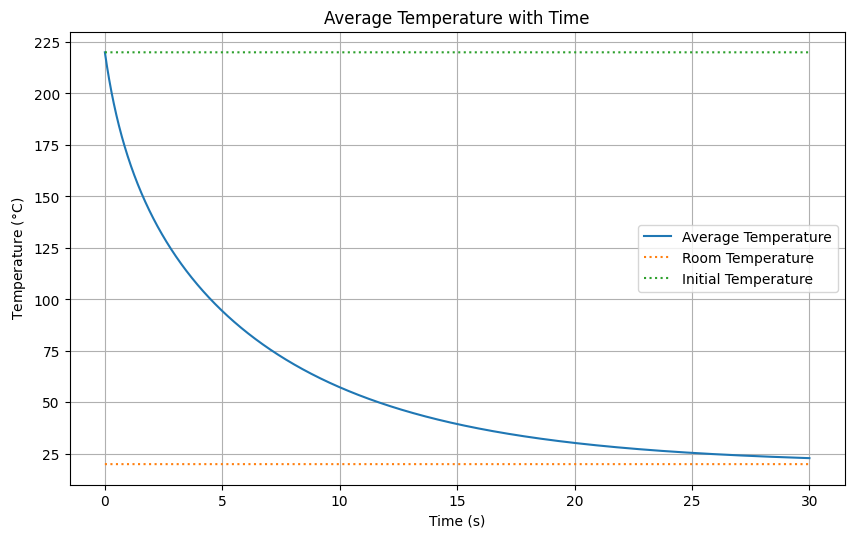

In [ ]:
plt.figure(figsize = (10,6), dpi = 100)                 # Setting up the resolution

plt.plot(time_hist, avg_temp, label = "Average Temperature")                            # Doing a line plot of average temp
plt.plot(time_hist, [rtp]*len(time_hist),":", label = "Room Temperature")               # Room temp
plt.plot(time_hist, [initial_T]*len(time_hist),":", label = "Initial Temperature")      # Initial temp

plt.title("Average Temperature with Time")              # Header for figure
plt.xlabel("Time (s)")                                  # Labelling the axes
plt.ylabel("Temperature ($\degree$C)")

plt.legend()                                            # Create a legend
plt.grid()                                              # Create a grid

plt.show()                                              # Printing the plot

## Possible Extensions

* Find the dependence on grid size of the object, or temperature
* Plot the standard deviation of the temperatre
* Consider a bread with different shape (cylinder/sphere)
    * Hint: Use a different coordinate system (Laplacian) or only consider points of the array that are a fixed distance from the centre
* Model uneven heating of the object, e.g. one-sided toast, hot pao centre, etc.
* Water vapour flow through the bread can be modelled similarly. It has a dependence on the heat of the bread to evaporate. 

## Animation of Thermal Profile (Optional)

We can turn our graphs into a animation showing the evolution over time. This requires us to first restart our model. We again initialise a hot flapjack:

In [ ]:
flapjack = [[[initial_T for z in range(10)] for y in range(20)] for x in range(20)]

flapjack = np.array(flapjack)

Next, we need to make a modification to the plotting function of the 3D graph. We have to define the figure outside the function so that it can be used by the animator.

While we are doing this, we also define all the key traits of the figure we want.

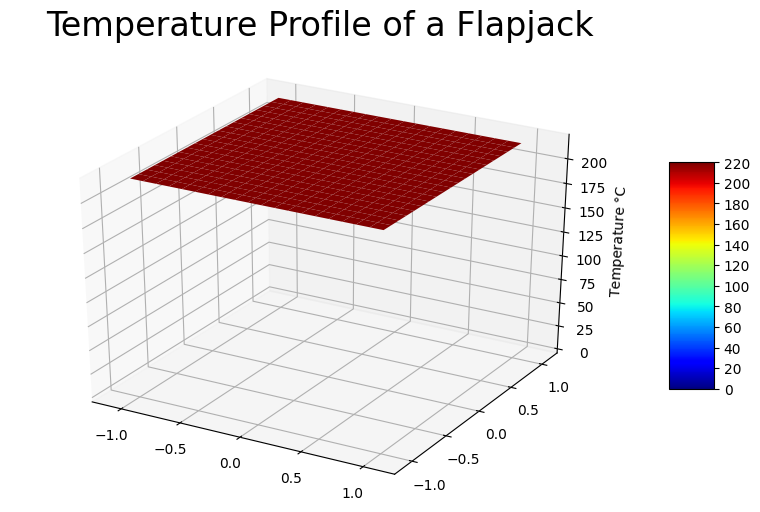

In [ ]:
fig = plt.figure(figsize = (10,6), dpi = 100)                   # Setting Resolution of Figure
ax = plt.axes(projection='3d')                                  # Preparing the background of figure


x_data = np.linspace(-1,1,flapjack.shape[0])                    # Prepare the points for plotting
y_data = np.linspace(-1,1,flapjack.shape[1])                    # We need to do this since we don't
                                                                # have a position grid for X and Y
                                                                # as our array only has temperature

X,Y = np.meshgrid(x_data,y_data)                                # Combining the grid into something matplotlib can use
Z = flapjack[:,:,int(flapjack.shape[2]/2)]                      # Temperature of the middle slice

surf = [ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor='none', vmax = initial_T, vmin = 0)]
                                                                # Plotting of the 3D surface

ax.set_xlim3d(-x_data[-1]*1.2, x_data[-1]*1.2)                  # Setting display limits on the axes
ax.set_ylim3d(-y_data[-1]*1.2, y_data[-1]*1.2)
ax.set_zlim3d(0, initial_T)

ax.set_zlabel("Temperature $\degree$C")                         # Labelling the axes

ax.set_title("Temperature Profile of a Flapjack", fontsize = 24, y = 1.1)
                                                                # Adding a figure header
                                                                
fig.colorbar(surf[0], ax = ax, shrink = 0.5, aspect = 5, ticks = np.linspace(0,220,12,endpoint = 1))
                                                                # Adding the colorbar

The animator function (`FuncAnimation`) requires a function that it repeatedly calls in order to produce the graph successively. We will now write this function

In [ ]:
def animator_fn(i, surf):                                           # Takes in a counter value, and the 3D plot

    global flapjack                                                 # To allow flapjack to be updated from within the function

    for j in range(10):                                             # Do 10 steps in time
        flapjack = flapjack + alpha * laplacian(flapjack) * delta_t # Update  thermal profile
                                                                    # We do this to plot every 10 timesteps, as it 
                                                                    # gets laggy if we plot ALL time steps
    
    print("Frame number: ", i, sep= '')                             # Counter: Keeps track of the #no of frames

    global X,Y                                                      # Summonning in the X,Y grid from outside the function
    Z = flapjack[:,:,int(flapjack.shape[2]/2)]                      # New temperature values

    surf[0].remove()                                                # Removes the previous plot
    surf[0] = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor='none', vmax = initial_T, vmin = 0)
                                                                    # And adds a new one

Now, finally, we can create our animation! This part will take a long time as it is generating a image for each step in time.

In [ ]:
anim = animation.FuncAnimation(fig,                                 # takes in the (1) figure, 
                               animator_fn,                         # (2) animation function
                               fargs = [surf],                      # (3) extra arguments
                               frames = int(runtime/delta_t/20),    # Number of frames
                               interval=10,                         # Time btwn frames
                               blit = False)                        # Google this yourself


plt.rcParams['animation.html'] = 'html5'
anim

Frame number: 0
Frame number: 0
Frame number: 1
Frame number: 2
Frame number: 3
Frame number: 4
Frame number: 5
Frame number: 6
Frame number: 7
Frame number: 8
Frame number: 9
Frame number: 10
Frame number: 11
Frame number: 12
Frame number: 13
Frame number: 14
Frame number: 15
Frame number: 16
Frame number: 17
Frame number: 18
Frame number: 19
Frame number: 20
Frame number: 21
Frame number: 22
Frame number: 23
Frame number: 24
Frame number: 25
Frame number: 26
Frame number: 27
Frame number: 28
Frame number: 29
Frame number: 30
Frame number: 31
Frame number: 32
Frame number: 33
Frame number: 34
Frame number: 35
Frame number: 36
Frame number: 37
Frame number: 38
Frame number: 39
Frame number: 40
Frame number: 41
Frame number: 42
Frame number: 43
Frame number: 44
Frame number: 45
Frame number: 46
Frame number: 47
Frame number: 48
Frame number: 49
Frame number: 50
Frame number: 51
Frame number: 52
Frame number: 53
Frame number: 54
Frame number: 55
Frame number: 56
Frame number: 57
Frame nu

You can also save the animation! Just replace the `anim` above with the code below and it will save itself to the left sidebar (in Colab).

In [ ]:
anim.save('Flapjack Cooling.mp4', fps=100, extra_args=['-vcodec', 'libx264'])
                # Save the animation and show the final state

Frame number: 0
Frame number: 0
Frame number: 1
Frame number: 2
Frame number: 3
Frame number: 4
Frame number: 5
Frame number: 6
Frame number: 7
Frame number: 8
Frame number: 9
Frame number: 10
Frame number: 11
Frame number: 12
Frame number: 13
Frame number: 14
Frame number: 15
Frame number: 16
Frame number: 17
Frame number: 18
Frame number: 19
Frame number: 20
Frame number: 21
Frame number: 22
Frame number: 23
Frame number: 24
Frame number: 25
Frame number: 26
Frame number: 27
Frame number: 28
Frame number: 29
Frame number: 30
Frame number: 31
Frame number: 32
Frame number: 33
Frame number: 34
Frame number: 35
Frame number: 36
Frame number: 37
Frame number: 38
Frame number: 39
Frame number: 40
Frame number: 41
Frame number: 42
Frame number: 43
Frame number: 44
Frame number: 45
Frame number: 46
Frame number: 47
Frame number: 48
Frame number: 49
Frame number: 50
Frame number: 51
Frame number: 52
Frame number: 53
Frame number: 54
Frame number: 55
Frame number: 56
Frame number: 57
Frame nu